In [1]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 194kB 12.3MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 


In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data('http://eve.kean.edu/~valentm3/CandleBlackBG.tgz')

In [4]:
train_files = get_image_files(path/'TrainValid')
test_files = get_image_files(path/'Test')

In [5]:
print(len(train_files))
print(len(test_files))

2482
612


In [6]:
def label_func(fname):
    return fname[0] == '1'

In [7]:
train_dls = ImageDataLoaders.from_name_func(path, train_files, label_func)

In [15]:
learn = cnn_learner(train_dls, resnet34, metrics=error_rate)
#print(learn.lr_find())
#learn.recorder.plot_lr_find()

In [16]:
learn.fine_tune(3,base_lr=5e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.246477,1.839657,0.358871,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.805199,42.511665,0.425403,00:52
1,0.596945,0.447535,0.185484,00:53
2,0.425769,0.350595,0.110887,00:53


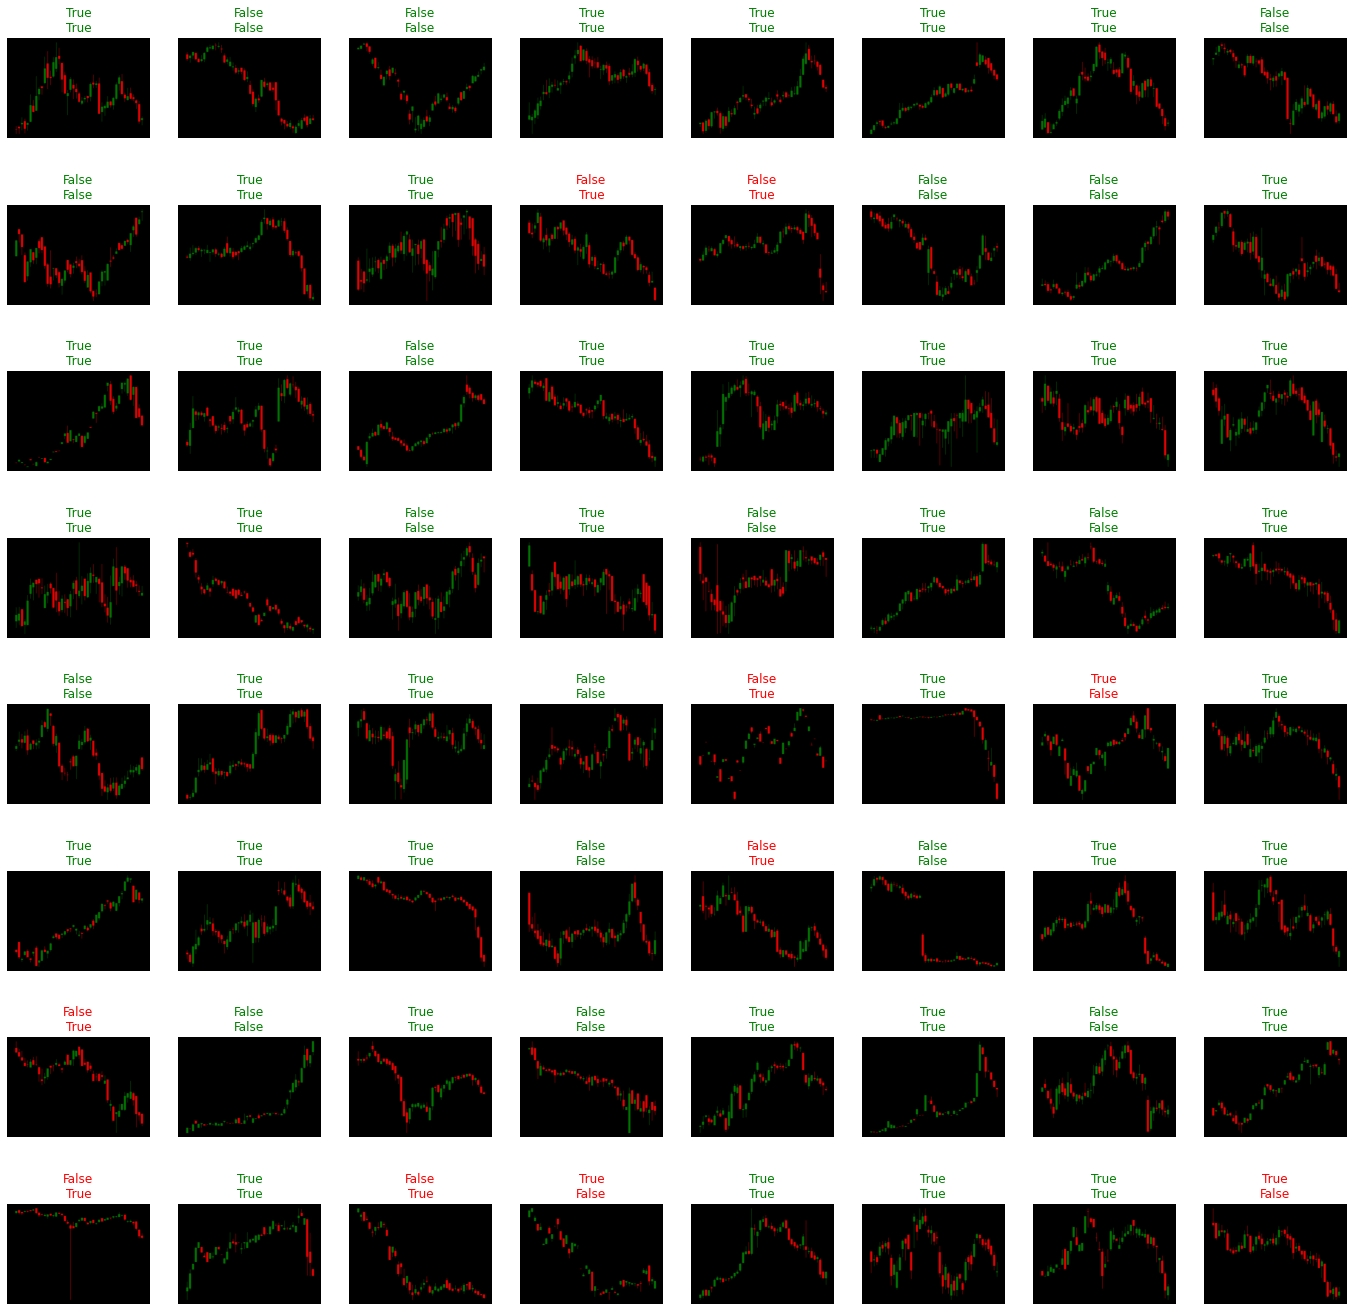

In [40]:
learn.show_results(max_n=100)

In [11]:
preds,y = learn.get_preds()
preds = np.argmax(np.array(preds),axis=1)
y = np.array(y)
accuracy = np.sum(y == preds)/len(preds)
print(f'Accuracy for validation set is: {accuracy}')

Accuracy for validation set is: 0.8830645161290323


In [30]:
# Get's accuracy on test set, and all 4 possibilities for confusion matrix
total = len(test_files)
correct = 0
positives = 0
negatives = 0
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0
for _file in test_files:

    # Correct in gerneral
    target = label_func(_file.name)
    pred = learn.predict(_file)[0] == 'True'
    correct += pred == target
    
    # Tally up everything
    if target:
        positives += 1
        if pred:
            true_positives += 1 # Actual true, pred true
        else:
            false_negatives += 1 # Actual true, pred false
    else:
        negatives += 1
        if pred:
            false_positives += 1 # Actual false, pred true
        else:
            true_negatives += 1 # Actual false, pred false

accuracy = correct/total
print(f'Accuracy for test set is: {accuracy}')
print(f'Actual True: {positives} | Predicted True: {true_positives}')
print(f'Actual True: {positives} | Predicted False: {false_negatives}')
print(f'Actual False: {negatives} | Predicted False: {true_negatives}')
print(f'Actual False: {negatives} | Predicted True: {false_positives}')

print(f'Chance of predicting to buy and being correct: {true_positives/(true_positives + false_positives)*100}')

Accuracy for test set is: 0.8741830065359477
Actual True: 258 | Predicted True: 235
Actual True: 258 | Predicted False: 23
Actual False: 354 | Predicted False: 300
Actual False: 354 | Predicted True: 54
Chance of predicting to buy and being correct: 81.31487889273356


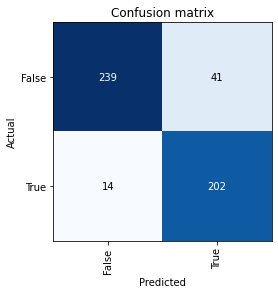

In [31]:
# Confusion matrix for validation set
from fastai.interpret import ClassificationInterpretation
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()